# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [201]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
number = 0
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
number = len(cities)
print(number)

594


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [225]:
name = []
cloudcover = []
countryid = []
date = []
humidity = []
xcoord = [] #longtitude
ycoord = [] #latitude
temperature = [] # current temperature
windspeed = []
array = 0

url = "https://api.openweathermap.org/data/2.5/weather?"

print(response)
for city in cities:
    response = requests.get(url+"appid="+api_key+"&q="+city+"&units=imperial")
    if (response.ok == False):
        print("404 Error: Data not found. Skipping city.")
    else:
        name.append(response.json()['name'])
        cloudcover.append(response.json()['clouds']['all'])
        countryid.append(response.json()['sys']['country'])
        date.append(response.json()['dt'])
        humidity.append(response.json()['main']['humidity'])
        ycoord.append(response.json()['coord']['lat'])
        xcoord.append(response.json()['coord']['lon'])
        temperature.append(response.json()['main']['temp'])         
        windspeed.append(response.json()['wind']['speed'])
        print(countryid[array], name[array])
        array = array + 1

<Response [200]>
MX La Reforma
MX Cabo San Lucas
PF Rikitea
CA Saint-Philippe
AR Barrow
CL Punta Arenas
GY Georgetown
GF Grand-Santi
CN Linhai
AU Jamestown
ZA Cape Town
ZA Somerset East
US Kapaa
CD Bukama
AU Bluff
CV Sao Filipe
GR Saint George
404 Error: Data not found. Skipping city.
RU Nyurba
GL Tasiilaq
PG Kavieng
US Vardo
PH Santiago
CA Tuktoyaktuk
404 Error: Data not found. Skipping city.
CA Sioux Lookout
MU Mahebourg
404 Error: Data not found. Skipping city.
AR Ushuaia
NZ Te Anau
BB Bathsheba
404 Error: Data not found. Skipping city.
AU Hobart
CI Tabou
NI Puerto Cabezas
NZ Mataura
KZ Zyryanovsk
KG Vorukh
RU Lavrentiya
SA Abha
AT Bludenz
AU Busselton
RU Puteyets
404 Error: Data not found. Skipping city.
CA Iqaluit
GL Qaanaaq
404 Error: Data not found. Skipping city.
BR Ponta do Sol
MZ Masuguru
KZ Atasu
PH Kinablangan
IN Vaini
MZ Quelimane
BR Maragogi
404 Error: Data not found. Skipping city.
CA Yellowknife
SN Gat
IR Dehloran
KI Butaritari
CA Haileybury
PG Namatanai
VE Zaraza
BR Ci

From cffi callback <function _verify_callback at 0x0000024444DA9730>:
Traceback (most recent call last):
  File "C:\Users\brent\Anaconda3\lib\site-packages\OpenSSL\SSL.py", line 306, in wrapper
    @wraps(callback)
KeyboardInterrupt


SSLError: HTTPSConnectionPool(host='api.open-weather.:map.org', port=443): Max retries exceeded with url: /data/2.5/weather?appid=44c84148de10b9c0c7170eb5aad347c4&q=srednekolymsk&units=imperial (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))

In [226]:
print(cloudcover)

[5, 3, 100, 90, 95, 75, 20, 26, 65, 0, 75, 13, 75, 100, 0, 73, 20, 85, 23, 54, 90, 93, 40, 90, 40, 21, 67, 40, 20, 60, 91, 90, 33, 89, 28, 0, 90, 45, 100, 90, 100, 63, 98, 100, 100, 75, 40, 48, 90, 52, 81, 21, 90, 0, 13, 16, 57, 74, 100, 40, 0, 0, 90, 40, 78, 27, 70, 80, 0, 31, 40, 0, 67, 6, 67, 94, 20, 90, 75, 40, 60, 32, 100, 90, 0, 41, 90, 0, 1, 40, 20, 100, 90, 100, 6, 90, 90, 67, 75]


In [227]:
print(name)

['La Reforma', 'Cabo San Lucas', 'Rikitea', 'Saint-Philippe', 'Barrow', 'Punta Arenas', 'Georgetown', 'Grand-Santi', 'Linhai', 'Jamestown', 'Cape Town', 'Somerset East', 'Kapaa', 'Bukama', 'Bluff', 'Sao Filipe', 'Saint George', 'Nyurba', 'Tasiilaq', 'Kavieng', 'Vardo', 'Santiago', 'Tuktoyaktuk', 'Sioux Lookout', 'Mahebourg', 'Ushuaia', 'Te Anau', 'Bathsheba', 'Hobart', 'Tabou', 'Puerto Cabezas', 'Mataura', 'Zyryanovsk', 'Vorukh', 'Lavrentiya', 'Abha', 'Bludenz', 'Busselton', 'Puteyets', 'Iqaluit', 'Qaanaaq', 'Ponta do Sol', 'Masuguru', 'Atasu', 'Kinablangan', 'Vaini', 'Quelimane', 'Maragogi', 'Yellowknife', 'Gat', 'Dehloran', 'Butaritari', 'Haileybury', 'Namatanai', 'Zaraza', 'Cidreira', 'Concordia', 'Nanzhang', 'Kutahya', 'Tabriz', 'Atuona', 'Severo-Kurilsk', 'Port Elizabeth', 'Bowen', 'Matagami', 'Ilulissat', 'Namibe', 'Port Alfred', 'Adrar', 'Lebu', 'Half Moon Bay', 'Evensk', 'Conceicao do Mato Dentro', 'Biak', 'Alekseyevsk', 'Ilhabela', 'Marrakesh', 'South River', 'Roald', 'Sinisco

In [228]:
print(date)

[1571810184, 1571809956, 1571810188, 1571810189, 1571810191, 1571810192, 1571810193, 1571810194, 1571810196, 1571810198, 1571810199, 1571810201, 1571810202, 1571810203, 1571810203, 1571810204, 1571810206, 1571810209, 1571810211, 1571810211, 1571810212, 1571810218, 1571810219, 1571810244, 1571810244, 1571810242, 1571810247, 1571810208, 1571810049, 1571810253, 1571810254, 1571810260, 1571810260, 1571810261, 1571810262, 1571810263, 1571810264, 1571810265, 1571810267, 1571810269, 1571810272, 1571810275, 1571810276, 1571810277, 1571810277, 1571810279, 1571810281, 1571810281, 1571810283, 1571810284, 1571810287, 1571810288, 1571810288, 1571810289, 1571810290, 1571810291, 1571810292, 1571810297, 1571810298, 1571810299, 1571810275, 1571810305, 1571810066, 1571810307, 1571810308, 1571810309, 1571810309, 1571810311, 1571810312, 1571810313, 1571810315, 1571810316, 1571810317, 1571810317, 1571810319, 1571810319, 1571810320, 1571810321, 1571810322, 1571810322, 1571810323, 1571810324, 1571810325, 157

In [229]:
print(countryid)

['MX', 'MX', 'PF', 'CA', 'AR', 'CL', 'GY', 'GF', 'CN', 'AU', 'ZA', 'ZA', 'US', 'CD', 'AU', 'CV', 'GR', 'RU', 'GL', 'PG', 'US', 'PH', 'CA', 'CA', 'MU', 'AR', 'NZ', 'BB', 'AU', 'CI', 'NI', 'NZ', 'KZ', 'KG', 'RU', 'SA', 'AT', 'AU', 'RU', 'CA', 'GL', 'BR', 'MZ', 'KZ', 'PH', 'IN', 'MZ', 'BR', 'CA', 'SN', 'IR', 'KI', 'CA', 'PG', 'VE', 'BR', 'AR', 'CN', 'TR', 'IR', 'PF', 'RU', 'US', 'AU', 'NG', 'GL', 'AO', 'ZA', 'DZ', 'ET', 'US', 'RU', 'BR', 'ID', 'RU', 'BR', 'MA', 'US', 'NO', 'IT', 'BR', 'MX', 'RU', 'US', 'IN', 'CK', 'CA', 'AR', 'US', 'NO', 'PT', 'CN', 'CL', 'PA', 'BR', 'PH', 'CA', 'ZA', 'JP']


In [230]:
print(humidity)

[74, 80, 85, 100, 93, 65, 100, 99, 38, 11, 67, 45, 74, 82, 32, 76, 71, 68, 68, 71, 100, 61, 85, 96, 69, 97, 75, 83, 63, 97, 97, 69, 62, 27, 85, 52, 93, 43, 94, 84, 52, 92, 63, 34, 76, 83, 83, 77, 94, 88, 25, 68, 81, 71, 96, 75, 95, 48, 100, 71, 73, 59, 93, 50, 93, 61, 79, 67, 25, 63, 87, 48, 93, 76, 71, 81, 76, 93, 76, 78, 82, 92, 73, 87, 61, 78, 100, 56, 70, 72, 87, 93, 87, 100, 94, 68, 100, 72, 63]


In [231]:
print(ycoord)

[25.08, 22.89, -23.12, 45.36, -38.31, -53.16, 6.8, 4.27, 28.86, -33.21, -33.93, -32.72, 22.08, -9.2, -23.58, 14.9, 39.45, 63.29, 65.61, -2.57, 39.62, 16.69, 69.44, 50.1, -20.41, -54.81, -45.41, 13.22, -42.88, 4.42, 14.04, -46.19, 49.74, 39.85, 65.58, 18.22, 47.15, -33.64, 65.17, 63.75, 77.48, -20.63, -11.38, 48.68, 7.69, 15.34, -17.88, -9.01, 62.45, 14.69, 32.69, 3.07, 47.44, -3.66, 9.35, -30.17, -31.4, 31.78, 39.42, 38.08, -9.8, 50.68, 39.31, -20.01, 9.67, 69.22, -15.19, -33.59, 27.87, 8.96, 37.46, 61.92, -19.04, -0.91, 57.84, -23.78, 31.63, 40.45, 62.58, 40.57, -19.76, 15.86, 71.98, 42.65, 29.6, -21.21, 45.63, -46.43, 39.95, 78.22, 37.09, 49.28, -29.95, 8.46, -29.77, 16.13, 49.78, -33.02, 37.4]


In [232]:
print(xcoord)

[-108.06, -109.91, -134.97, -73.48, -60.23, -70.91, -58.16, -54.38, 121.14, 138.6, 18.42, 25.59, -159.32, 25.85, 149.07, -24.5, 22.34, 118.35, -37.64, 150.8, -77.74, 121.54, -133.03, -91.92, 57.7, -68.31, 167.72, -59.52, 147.33, -7.36, -83.39, 168.86, 84.27, 70.57, -170.99, 42.5, 9.82, 115.35, 57.09, -68.52, -69.36, -46, 38.46, 71.64, 126.55, 74.49, 36.89, -35.22, -114.38, -16.54, 47.27, 172.79, -79.64, 152.44, -65.33, -50.22, -58.02, 111.84, 29.98, 46.29, -139.03, 156.12, -74.98, 148.25, 8.4, -51.1, 12.15, 26.89, -0.29, 38.73, -122.43, 159.24, -43.42, 122.88, 108.35, -45.36, -7.99, -74.39, 6.12, 9.69, -44.31, -97.07, 102.47, -73.75, 79.66, -159.78, -73.98, -67.52, -94.76, 15.63, -8.25, 120.73, -71.34, -82.28, -57.08, 119.78, -74.86, 27.91, 136.9]


In [233]:
print(temperature)

[75.65, 72.72, 69.91, 52.43, 48.45, 44.28, 75.2, 70.84, 79.3, 87.84, 59.02, 56.75, 79.16, 76.48, 82.13, 73.62, 51.42, 25.05, 26.6, 85.21, 50.23, 85.95, 23, 33.8, 77.81, 33.75, 41.85, 78.8, 66.87, 73.18, 75.24, 51.01, 23.5, 53.6, 32.16, 65.34, 46.72, 66.56, 28.38, 32, 14.09, 64.26, 82.49, 37.94, 80.02, 77, 80.6, 78.03, 33.37, 75.2, 87.49, 85.05, 46.4, 85.46, 71.28, 63.03, 55.99, 71.92, 41, 51.8, 79.29, 43, 60.53, 78.44, 69.04, 17.6, 68.25, 64, 62.6, 58.53, 61.72, 15.31, 64.99, 81.59, 24.03, 71.46, 50, 60.31, 49.59, 71.6, 68.9, 70.14, 15.69, 53.8, 80.6, 78.8, 52.27, 47.39, 43.59, 14, 53.85, 31.8, 56.43, 62.01, 54.37, 85.66, 42.8, 59, 66.2]


In [234]:
print(windspeed)

[5.66, 1.01, 17.09, 6.93, 10.47, 13.87, 2.24, 1.1, 4.14, 6.67, 10.29, 16.89, 13.87, 2.8, 20.42, 23.13, 9.17, 3.87, 4.7, 11.79, 5.82, 4.05, 13.87, 10.29, 10.29, 4.68, 12.19, 21.92, 19.46, 0.72, 1.81, 8.99, 1.92, 5.93, 17.52, 5.82, 2.24, 18.34, 13.22, 10.29, 12.75, 3.87, 5.03, 8.86, 4, 9.17, 9.17, 13.73, 3.18, 11.41, 8.66, 10.31, 12.75, 15.39, 2.21, 4.61, 2.68, 4.21, 5.53, 2.24, 13.67, 4.43, 10.29, 17.22, 1.1, 5.82, 3.96, 8.01, 4.7, 3.27, 3, 9.08, 2.53, 17.67, 7.74, 10.8, 4.7, 4.7, 13.87, 16.11, 5.82, 2.89, 19.82, 12.75, 2.24, 5.82, 6.93, 3.67, 6.93, 5.82, 6.93, 4.29, 6.93, 3, 6.67, 8.77, 12.75, 9.17, 9.17]


In [235]:
import pandas as pd
### Convert Raw Data to DataFrame
citydf = pd.DataFrame(zip(countryid, name, xcoord, ycoord, date, windspeed, cloudcover, humidity, lowest, highest))
citydf.rename(columns = {0: 'Country', # 0 is the key
                   1: 'City', 
                   2: 'Longtitude', 
                   3: 'Latitude', 
                   4: 'Date', 
                   5: 'Windspeed', 
                   6: 'Cloud Cover (%)', 
                   7: 'Humidity', 
                   8: 'Min Temperature (F)', 
                   9: 'Max Temperature (F)'
                  }, inplace=True)
# Export the city data into a .csv.
import csv
citydf.to_csv("cities.csv", encoding='utf-8', index=False)
    
# Display the DataFrame
citydf.head(array)

,Country,City,Longtitude,Latitude,Date,Windspeed,Cloud Cover (%),Humidity,Min Temperature (F),Max Temperature (F)
0,MX,La Reforma,-108.06,25.08,1571810184,5.66,5,74,46.40,46.40
1,MX,Cabo San Lucas,-109.91,22.89,1571809956,1.01,3,80,48.99,55.40
2,PF,Rikitea,-134.97,-23.12,1571810188,17.09,100,85,74.44,74.44
3,CA,Saint-Philippe,-73.48,45.36,1571810189,6.93,90,100,75.20,75.20
4,AR,Barrow,-60.23,-38.31,1571810191,10.47,95,93,55.40,55.40
5,CL,Punta Arenas,-70.91,-53.16,1571810192,13.87,75,65,75.99,77.00
6,GY,Georgetown,-58.16,6.80,1571810193,2.24,20,100,66.00,70.00
7,GF,Grand-Santi,-54.38,4.27,1571810194,1.10,26,99,67.55,67.55
8,CN,Linhai,121.14,28.86,1571810196,4.14,65,38,85.66,85.66
9,AU,Jamestown,138.60,-33.21,1571810198,6.67,0,11,32.63,32.63


In [237]:
print(array)

99


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

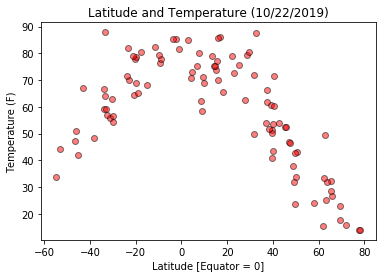

<Figure size 432x288 with 0 Axes>

In [238]:
colors = ('r')
plt.scatter(ycoord, temperature, c=colors, alpha=0.5, edgecolor="black") #latitude and max temperature
plt.title('Latitude and Temperature (10/22/2019)')
plt.xlabel('Latitude [Equator = 0]') # 0 is the equator
plt.ylabel('Temperature (F)')
plt.show()
plt.savefig('figure1.png')

#### Latitude vs. Humidity Plot

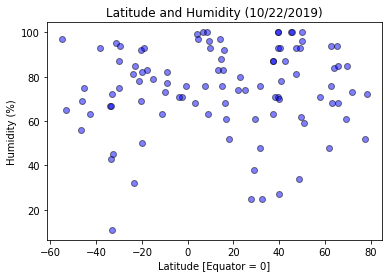

<Figure size 432x288 with 0 Axes>

In [239]:
colors = ('b')
plt.scatter(ycoord, humidity, c=colors, alpha=0.5, edgecolor="black") #latitude and humidity
plt.title('Latitude and Humidity (10/22/2019)')
plt.xlabel('Latitude [Equator = 0]')
plt.ylabel('Humidity (%)')
plt.show()
plt.savefig('figure2.png')

#### Latitude vs. Cloudiness Plot

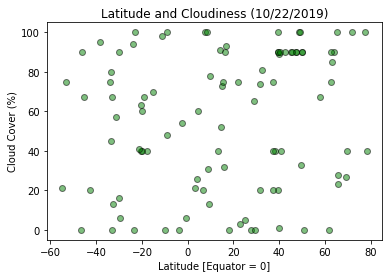

<Figure size 432x288 with 0 Axes>

In [240]:
colors = ('g')
plt.scatter(ycoord, cloudcover, c=colors, alpha=0.5, edgecolor="black") #latitude and cloudiness
plt.title('Latitude and Cloudiness (10/22/2019)')
plt.xlabel('Latitude [Equator = 0]')
plt.ylabel('Cloud Cover (%)')
plt.show()
plt.savefig('figure3.png')

#### Latitude vs. Wind Speed Plot

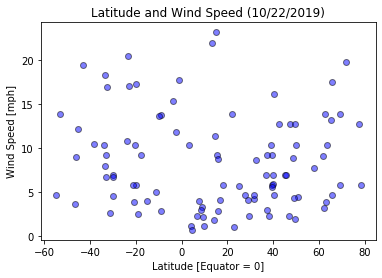

<Figure size 432x288 with 0 Axes>

In [241]:
colors = ('b')
plt.scatter(ycoord, windspeed, c=colors, alpha=0.5, edgecolor="black") #latitude and wind speed
plt.title('Latitude and Wind Speed (10/22/2019)')
plt.xlabel('Latitude [Equator = 0]')
plt.ylabel('Wind Speed [mph]')
plt.show()
plt.savefig('figure4.png')

In [ ]:
# Peak temperatures occur at a latitude of 30 on either side before dropping down as they go farther from the equator
# A good amount of northern countries are cloudy and windy
# Latitude is irrelevant to humidity